In [ ]:
include("FiguresforPNAS.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


In [49]:
using Plots
using Roots
include("DICEFARM_Annual.jl")
include("VegSocialCosts.jl")
DICEFARM = create_dice_farm()
run(DICEFARM)
BaseTemp = DICEFARM[:co2_cycle, :T]
BaseWelfare = DICEFARM[:welfare, :UTILITY]
DICELength = length(DICEFARM[:farm, :Beef])
TwentyTwenty = 2020-1764

# ----- Plot against Vegan World ------ #
OrigBeef = DICEFARM[:farm, :Beef]
OrigDairy = DICEFARM[:farm, :Dairy]
OrigPork = DICEFARM[:farm, :Pork]
OrigPoultry = DICEFARM[:farm, :Poultry]
OrigEggs = DICEFARM[:farm, :Eggs]
OrigSheepGoat = DICEFARM[:farm, :SheepGoat]

VeganDICE = create_dice_farm()
set_param!(VeganDICE, :farm, :Beef, [OrigBeef[1:5]; zeros(DICELength-5)])  			#Keep 2015-2019 consumption
set_param!(VeganDICE, :farm, :Dairy, [OrigDairy[1:5]; zeros(DICELength-5)])
set_param!(VeganDICE, :farm, :Poultry, [OrigPoultry[1:5]; zeros(DICELength-5)])
set_param!(VeganDICE, :farm, :Pork, [OrigPork[1:5]; zeros(DICELength-5)])
set_param!(VeganDICE, :farm, :Eggs, [OrigEggs[1:5]; zeros(DICELength-5)])
set_param!(VeganDICE, :farm, :SheepGoat, [OrigSheepGoat[1:5]; zeros(DICELength-5)])
run(VeganDICE)
VeganTemp = VeganDICE[:co2_cycle, :T]
plotT = 2120
t = collect(2020:1:plotT)
TempDiff = BaseTemp[TwentyTwenty + length(t)] - VeganTemp[TwentyTwenty+length(t)]
println("Temp Diff is $TempDiff")
plot(t, [BaseTemp[TwentyTwenty:TwentyTwenty+length(t)-1] VeganTemp[TwentyTwenty:TwentyTwenty+length(t)-1]], linewidth=2, linecolor=[:black :green], label=["BAU" "Vegan"], legend=:topleft, linestyle=[:solid :dash])
savefig("Figures//PNAS//VeganTemp.pdf")
savefig("Figures//PNAS//VeganTemp.svg")

# ------ Plot Vegan Pulse vs Gas Pulse ------- #

BeefPulse = copy(OrigBeef)
DairyPulse = copy(OrigDairy)
PorkPulse = copy(OrigPork)
PoultryPulse = copy(OrigPoultry)
EggsPulse = copy(OrigEggs)
SheepGoatPulse = copy(OrigSheepGoat)

BeefPulse[6] = OrigBeef[6] + 1000*(4.5) 				#Add pulse to year 2020
DairyPulse[6] = OrigDairy[6] + 1000*(8)
PorkPulse[6] = OrigPork[6]  + 1000*(2.7)
PoultryPulse[6] = OrigPoultry[6] + 1000*(6.5)
EggsPulse[6] = OrigEggs[6]  + 1000*(1.6)
SheepGoatPulse[6] = OrigSheepGoat[6] + 1000*(.06)

#Model With Vegan Pulse
VeganPulse = create_dice_farm()
set_param!(VeganPulse, :farm, :Beef, BeefPulse)
set_param!(VeganPulse, :farm, :Dairy, DairyPulse)
set_param!(VeganPulse, :farm, :Poultry, PoultryPulse)
set_param!(VeganPulse, :farm, :Pork, PorkPulse)
set_param!(VeganPulse, :farm, :Eggs, EggsPulse)
set_param!(VeganPulse, :farm, :SheepGoat, SheepGoatPulse)
run(VeganPulse)
VeganIRF = VeganPulse[:co2_cycle, :T] - BaseTemp

##Model with Gasoline Pulse
GasPulse = create_dice_farm()
T = DICELength
pulse = 1000*4.63*1e-9
set_param!(GasPulse, :emissions, :Co2Pulse, pulse)
run(GasPulse)
GasIRF = GasPulse[:co2_cycle, :T] - BaseTemp
HHEnergyPulse = create_dice_farm()
T = DICELength
pulse = 1000*8.67/2.5*1e-9
set_param!(HHEnergyPulse, :emissions, :Co2Pulse, pulse)
run(HHEnergyPulse)
HHEnergyIRF = HHEnergyPulse[:co2_cycle, :T] - BaseTemp
plot(t, 1e-3*[VeganIRF[TwentyTwenty:TwentyTwenty+length(t)-1] GasIRF[TwentyTwenty:TwentyTwenty+length(t)-1] HHEnergyIRF[TwentyTwenty:TwentyTwenty+length(t)-1]], legend=:topright, label=["Diet" "Passenger Vehicle" "Household Energy (Per Capita)"], linewidth=2, linestyle=[:solid :dash :dashdot], color=[:green :black :orange], ylabel="Temperature Change (C)")
savefig("Figures//PNAS//VeganIRF.pdf")
savefig("Figures//PNAS//VeganIRF.svg")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61


Temp Diff is 0.47945142681236286


┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61


Our cost under GWP estimates: 65.6587635862705


┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


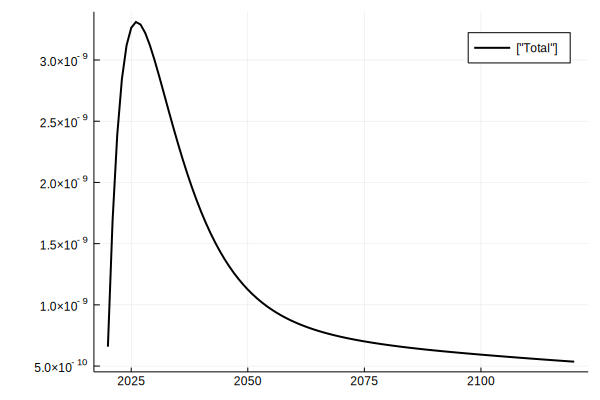

In [43]:
include("IRFByGas.jl")

In [42]:
SCC

26.490909090909092

In [24]:
Co2Pulse

6.772799991949796e-7

In [28]:
MethPulse*1e-3*30

1.356655999643408e-6

In [29]:
N2oPulse*1e-3*270

5.899594638858475e-7

In [39]:
26.5*(Co2Pulse + MethPulse*1e-3*30 + N2oPulse*1e-3*260)*1e6

70.10759790872179

In [67]:
Diets = [4.8; 8; 2.7; 6.7; 1.5; .06]
Intensities = [65.1 6.5 .22; 14.6 2.1 .22; 25.6 .02 .02; 25.1 .70 .03; 20.1 .07 .03; 20 4.5 .016]

6×3 Array{Float64,2}:
 65.1  6.5   0.22 
 14.6  2.1   0.22 
 25.6  0.02  0.02 
 25.1  0.7   0.03 
 20.1  0.07  0.03 
 20.0  4.5   0.016

In [80]:
ESEA_Intensities = [49.9 8.85 .266; 19.92 2.17 .07; 35.7 .031 .049; 26.7 .81 .053; 26.9 0.05 .039; 30.0 4.36 .131]
EEU_Intensities  = [29.9 2.11 .07; 10.1 1.84 .03; 14.4 .02 .02; 25.1 .35 .03; 8.2 .02 .03; 14.3 1.84 .05]
LatAm_Intensities = [141.84 7.89 .24; 13.15 2.9 .24; 25.44 .02 .02; 27.4 .62 0.04; 16.9 .17 .02; 12.46 6.29 .13]
MidEast_Intensities = [16.04 5.62 .43; 14.9 3.48 .25; 27.34 .02 .03; 39.9 0.65 .04; 14.2 .1 .02; 24.3 5.32 .4]
NO_Intensities 		= [14.08 3.67 .14	; 14.4 1.44 .02		; 14.35 .02 .02	; 15.24 .61 .02	; 7.57 .12 .02	; 22.3 4.17 .18]
Oceania_Intensities = [21.7 4.39 .22	; 15.02 2.93 .10	; 28.4 .02 .02	; 25.02 2.01 .02; 12.8 .05 .02	; 16.25 2.93 .10]
Socialcosts = VegSocialCosts(Oceania_Intensities, Diets)

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


8×2 Array{Any,2}:
 "Vegan"       41.4909    
 "Vegetarian"  27.7182    
 "Beef"         0.118182  
 "Dairy"        0.0454545 
 "Poultry"      0.0181818 
 "Pork"         0.00909091
 "Eggs"         0.0       
 "Sheep/Goat"   0.127273  

In [74]:
Intensities

6×3 Array{Float64,2}:
 65.1  6.5   0.22 
 14.6  2.1   0.22 
 25.6  0.02  0.02 
 25.1  0.7   0.03 
 20.1  0.07  0.03 
 20.0  4.5   0.016

In [75]:
ESEA_Intensities

6×3 Array{Float64,2}:
 49.9   8.85   0.266
 19.92  2.17   0.069
 35.7   0.031  0.049
 26.7   0.81   0.053
 26.9   0.05   0.039
 30.0   4.36   0.131

In [1]:
using Plots
using Roots
include("DICEFARM_Annual.jl")
include("VegSocialCosts.jl")
DICEFARM = create_dice_farm()
run(DICEFARM)
BaseTemp = DICEFARM[:co2_cycle, :T]
BaseWelfare = DICEFARM[:welfare, :UTILITY]
DICELength = length(DICEFARM[:farm, :Beef])
TwentyTwenty = 2020-1764

# ----- Plot against Vegan World ------ #
OrigBeef = DICEFARM[:farm, :Beef]
OrigDairy = DICEFARM[:farm, :Dairy]
OrigPork = DICEFARM[:farm, :Pork]
OrigPoultry = DICEFARM[:farm, :Poultry]
OrigEggs = DICEFARM[:farm, :Eggs]
OrigSheepGoat = DICEFARM[:farm, :SheepGoat]

┌ Info: Precompiling MimiFAIR13 [abca78a2-5d8f-4d00-8ed7-def17d07bf5a]
└ @ Base loading.jl:1273
┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1273
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273
┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


486-element Array{Float64,1}:
 2.9612e9            
 2.998410474967886e9 
 3.0350138171704254e9
 3.071007368561221e9 
 3.106389287472134e9 
 3.141158509019743e9 
 3.1753147060223093e9
 3.2088582505247474e9
 3.241790176017872e9 
 3.2741121404276104e9
 3.305826389939907e9 
 3.336935723717746e9 
 3.3674434595580134e9
 ⋮                   
 4.599997567592645e9 
 4.59999763655483e9  
 4.599997703561839e9 
 4.5999977686691065e9
 4.599997831930491e9 
 4.599997893398327e9 
 4.599997953123463e9 
 4.599998011155307e9 
 4.599998067541866e9 
 4.599998122329787e9 
 4.599998175564394e9 
 4.599998227289723e9 

In [22]:
# -------- Total Social Costs --------------- #
GlobalVeganPulse = create_dice_farm()
GlobalBeefPulse = copy(OrigBeef)
GlobalDairyPulse = copy(OrigDairy)
GlobalPorkPulse = copy(OrigPork)
GlobalPoultryPulse = copy(OrigPoultry)
GlobalEggsPulse = copy(OrigEggs)
GlobalSheepGoatPulse = copy(OrigSheepGoat)

GlobalBeefPulse[6] = 0
GlobalDairyPulse[6] = 0
GlobalPorkPulse[6] = 0
GlobalPoultryPulse[6] = 0
GlobalEggsPulse[6] = 0
GlobalSheepGoatPulse[6] = 0

set_param!(GlobalVeganPulse, :farm, :Beef, GlobalBeefPulse)
set_param!(GlobalVeganPulse, :farm, :Dairy, GlobalDairyPulse)
set_param!(GlobalVeganPulse, :farm, :Poultry, GlobalPoultryPulse)
set_param!(GlobalVeganPulse, :farm, :Pork, GlobalPorkPulse)
set_param!(GlobalVeganPulse, :farm, :Eggs, GlobalEggsPulse)
set_param!(GlobalVeganPulse, :farm, :SheepGoat, GlobalSheepGoatPulse)

run(GlobalVeganPulse)
WGlobalPulse = GlobalVeganPulse[:welfare, :UTILITY]

NewBaseline = create_dice_farm()

function ConsEquiv(m, W)
	function f(x)
		set_param!(m, :neteconomy, :CEQ, x)
		run(m)
		diff = m[:welfare, :UTILITY] - W
		return diff
	end
CEQ = find_zero(f, (-1, 1), Bisection())
CEQ = CEQ
return CEQ
end

GlobalPulseCost = -1000*ConsEquiv(NewBaseline, WGlobalPulse) #convert from trillions to billions
println("Total Social Costs of 1 year of meat production are $GlobalPulseCost Billion dollars")

Total Social Costs of 1 year of meat production are 229.13071885402303 Billion dollars


In [13]:
DICEFARM[:welfare, :UTILITY]

23856.565532043045

In [14]:
WGlobalPulse

23856.7491536952